<a href="https://colab.research.google.com/github/IamBhanuYenumula/Byen_DataScience_expo/blob/main/Feature_selection_with_FilterBasedTechniques.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [220]:
import pandas as pd
import numpy as np

# Modify the URL to point to the raw CSV file
url = "https://raw.githubusercontent.com/IamBhanuYenumula/Byen_DataScience_expo/main/Datasets/Human_activity_recognition_with_smartphones/train.csv"
df = pd.read_csv(url, index_col=0)
df.head()

,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,tBodyAcc-max()-Y,...,fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",subject,Activity
tBodyAcc-mean()-X,,,,,,,,,,,,,,,,,,,,,
0.288585,-0.020294,-0.132905,-0.995279,-0.983111,-0.913526,-0.995112,-0.983185,-0.923527,-0.934724,-0.567378,...,-0.710304,-0.112754,0.030400,-0.464761,-0.018446,-0.841247,0.179941,-0.058627,1,STANDING
0.278419,-0.016411,-0.123520,-0.998245,-0.975300,-0.960322,-0.998807,-0.974914,-0.957686,-0.943068,-0.557851,...,-0.861499,0.053477,-0.007435,-0.732626,0.703511,-0.844788,0.180289,-0.054317,1,STANDING
0.279653,-0.019467,-0.113462,-0.995380,-0.967187,-0.978944,-0.996520,-0.963668,-0.977469,-0.938692,-0.557851,...,-0.760104,-0.118559,0.177899,0.100699,0.808529,-0.848933,0.180637,-0.049118,1,STANDING
0.279174,-0.026201,-0.123283,-0.996091,-0.983403,-0.990675,-0.997099,-0.982750,-0.989302,-0.938692,-0.576159,...,-0.482845,-0.036788,-0.012892,0.640011,-0.485366,-0.848649,0.181935,-0.047663,1,STANDING
0.276629,-0.016570,-0.115362,-0.998139,-0.980817,-0.990482,-0.998321,-0.979672,-0.990441,-0.942469,-0.569174,...,-0.699205,0.123320,0.122542,0.693578,-0.615971,-0.847865,0.185151,-0.043892,1,STANDING


In [221]:
df.shape

(7352, 562)

In [222]:
X=df.drop('Activity',axis=1)
y = df['Activity']

Performing Logistic Regression with all the featurs to check the accuracy

In [223]:
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [224]:
# Encode target label
le=LabelEncoder()
y=le.fit_transform(y)
# split dataset
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=20)
print(X_train.shape)
print(X_test.shape)

(5881, 561)
(1471, 561)


In [225]:
# initialize and train Logistic Regression model
log_reg = LogisticRegression()
log_reg.fit(X_train,y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [226]:
y_pred = log_reg.predict(X_test)
# r2 score
accuracy = accuracy_score(y_test,y_pred)
print("test accuracy:",accuracy)

test accuracy: 0.9802855200543847


Let's try to reduce features using filter technique methods and compare the accuracy score with first accuracy score

In [227]:
# Identify the duplicate features and drop them from data set
X_train = X_train.T.drop_duplicates().T
X_test = X_test.T.drop_duplicates().T
print(X_train.shape)
print(X_test.shape)

(5881, 540)
(1471, 540)


## Variance threshold method

In [228]:
# remove features based on the threshold value 0.05 using Variance Threshold and apply the changes to X_train and X_test
from sklearn.feature_selection import VarianceThreshold
sel = VarianceThreshold(threshold=0.05)
sel.fit(X_train)








VarianceThreshold(threshold=0.05)

In [229]:
sum(sel.get_support())

352

In [230]:
columns=X_train.columns[sel.get_support()]
columns

Index(['tBodyAcc-std()-X', 'tBodyAcc-std()-Y', 'tBodyAcc-std()-Z',
       'tBodyAcc-mad()-X', 'tBodyAcc-mad()-Y', 'tBodyAcc-mad()-Z',
       'tBodyAcc-max()-X', 'tBodyAcc-max()-Y', 'tBodyAcc-max()-Z',
       'tBodyAcc-min()-X',
       ...
       'fBodyBodyGyroJerkMag-skewness()', 'fBodyBodyGyroJerkMag-kurtosis()',
       'angle(tBodyAccMean,gravity)', 'angle(tBodyAccJerkMean),gravityMean)',
       'angle(tBodyGyroMean,gravityMean)',
       'angle(tBodyGyroJerkMean,gravityMean)', 'angle(X,gravityMean)',
       'angle(Y,gravityMean)', 'angle(Z,gravityMean)', 'subject'],
      dtype='object', length=352)

In [231]:
X_train = sel.transform(X_train)
X_test = sel.transform(X_test)

X_train = pd.DataFrame(X_train,columns=columns)
X_test = pd.DataFrame(X_test,columns=columns)

print(X_train.shape)
print(X_test.shape)

(5881, 352)
(1471, 352)


Lets use correlation technique to reduce further

## Correlation

<Axes: >

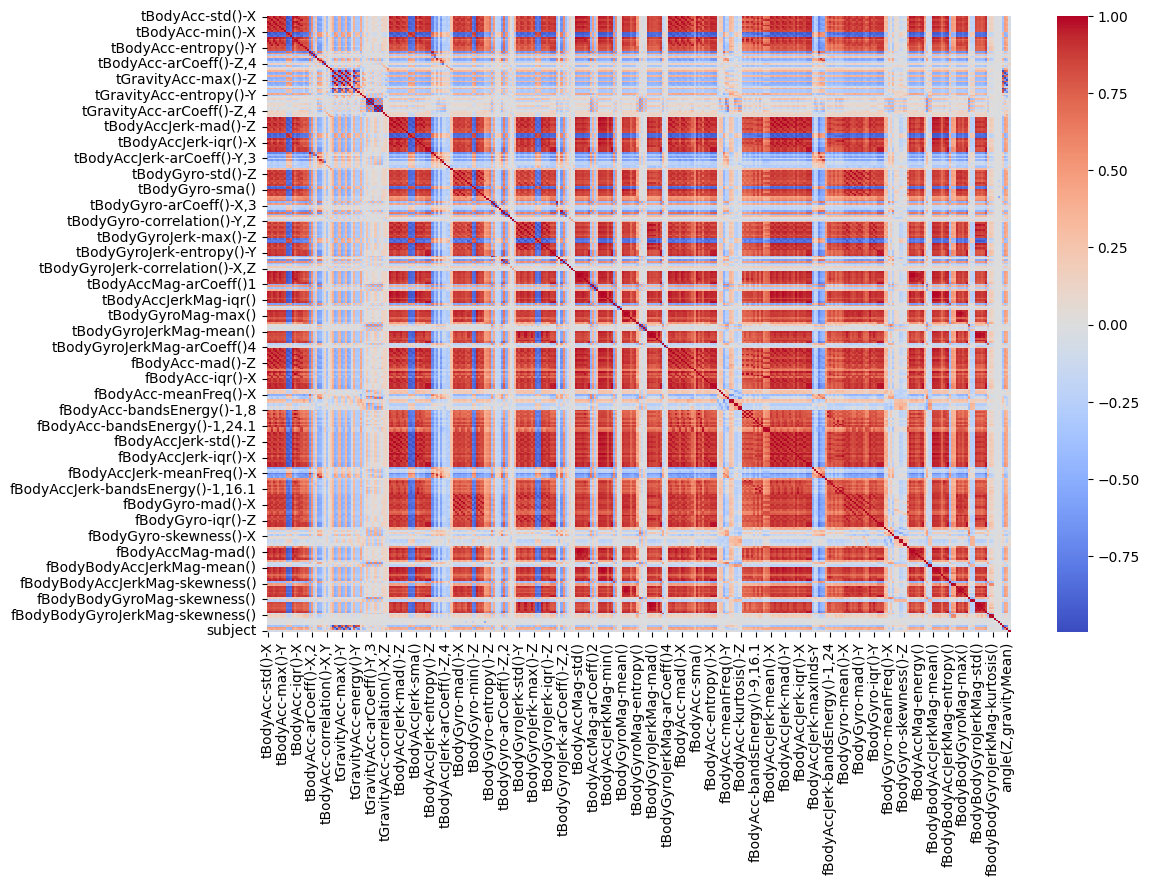

In [232]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12,8))
sns.heatmap(X_train.corr(), cmap = 'coolwarm')

In [233]:
corr_matrix = X_train.corr()
corr_matrix.shape

(352, 352)

In [234]:
# calculating correlation with target variable
target_corr = X_train.corrwith(pd.Series(y_train)).abs()
target_corr

tBodyAcc-std()-X                        0.816918
tBodyAcc-std()-Y                        0.826700
tBodyAcc-std()-Z                        0.801924
tBodyAcc-mad()-X                        0.807516
tBodyAcc-mad()-Y                        0.827330
                                          ...   
angle(tBodyGyroJerkMean,gravityMean)    0.006243
angle(X,gravityMean)                    0.621281
angle(Y,gravityMean)                    0.724446
angle(Z,gravityMean)                    0.610213
subject                                 0.045386
Length: 352, dtype: float64

In [235]:
threshold = 0.9
corr_matrix = X_train.corr()
columns_to_drop = set()
target_corr = X_train.corrwith(pd.Series(y_train)).abs()

for i in range(corr_matrix.shape[0]):
  for j in range(i+1,corr_matrix.shape[0]):
    if abs(corr_matrix.iloc[i,j]) > threshold:
      # print(f"There is a very high correlation of '{corr_matrix.iloc[i,j]:.2f}' between'{X_train.columns[i]}' and '{X_train.columns[j]}'")
      # print(f"{target_corr[corr_matrix.columns[i]]} and {target_corr[corr_matrix.columns[j]]}" )
      if target_corr[corr_matrix.columns[i]] < target_corr[corr_matrix.columns[j]]:
        columns_to_drop.add(X_train.columns[i])
      else:
        columns_to_drop.add(X_train.columns[j])
print(len(columns_to_drop))
columns = list(columns_to_drop)
columns

# remove columns from X_train and X_test

X_train = X_train.drop(columns=columns)
X_test = X_test.drop(columns=columns)

print(X_train.shape)
print(X_test.shape)


241
(5881, 111)
(1471, 111)


<Axes: >

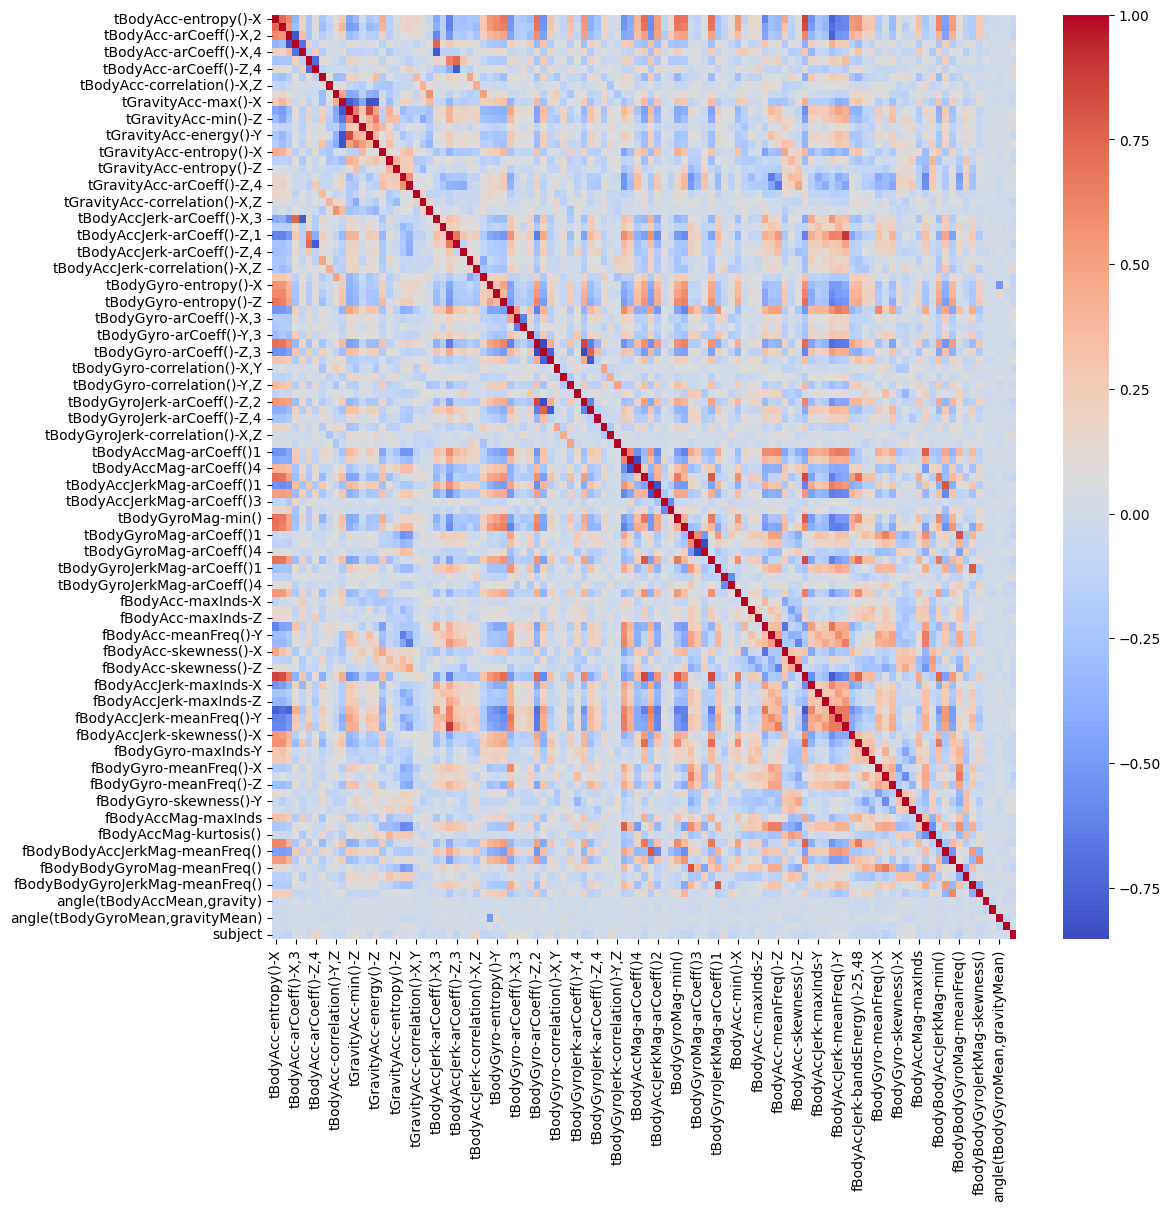

In [236]:
plt.figure(figsize=(12,12))
sns.heatmap(X_train.corr(), cmap ='coolwarm')

Lets try to use ANOVA to remove features

ANOVA

In [237]:
from sklearn.feature_selection import f_classif,SelectKBest
sel = SelectKBest(f_classif,k=100).fit(X_train,y_train)
columns = X_train.columns[sel.get_support()]
columns = list(columns)

X_train = sel.transform(X_train)
X_test = sel.transform(X_test)

X_train = pd.DataFrame(X_train,columns=columns)
X_test = pd.DataFrame(X_test,columns=columns)

print(X_train.shape)
print(X_test.shape)


(5881, 100)
(1471, 100)


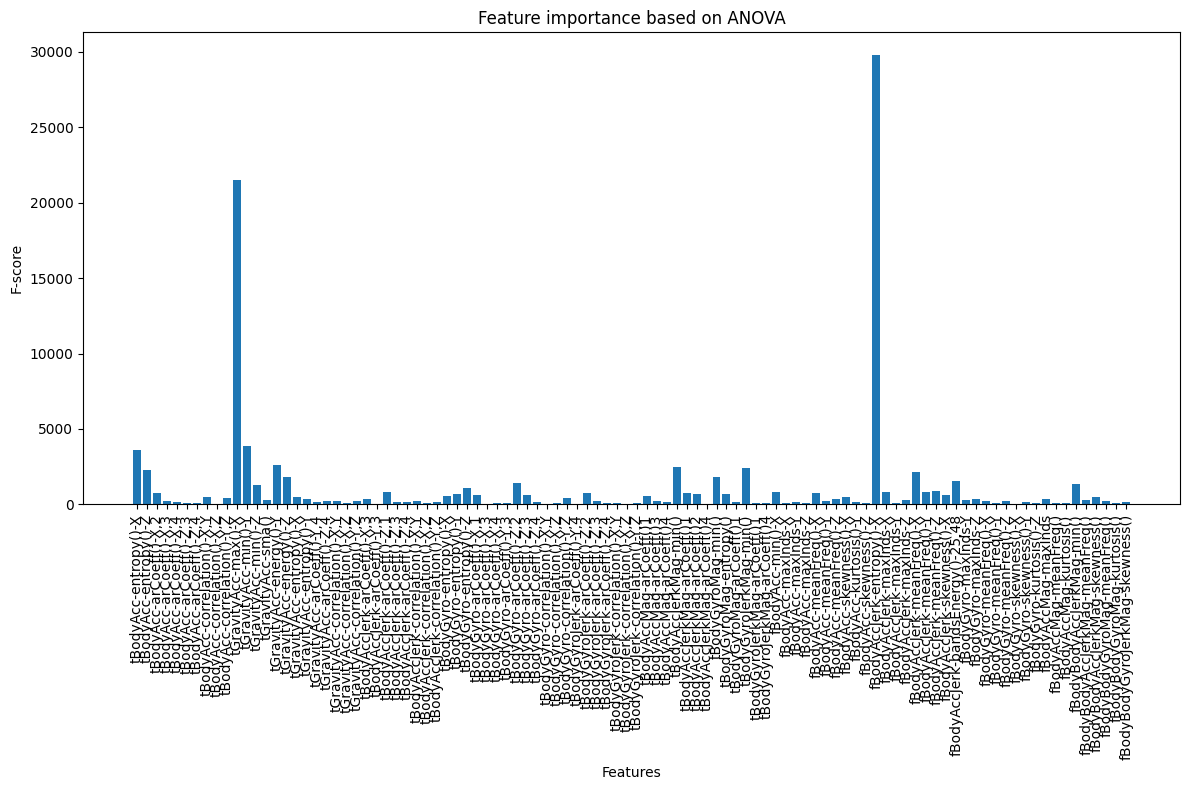

tBodyAcc-entropy()-X's F-Score: 3612.50 and P-value: 3612.50
tBodyAcc-entropy()-Z's F-Score: 2286.88 and P-value: 2286.88
tBodyAcc-arCoeff()-X,2's F-Score: 737.48 and P-value: 737.48
tBodyAcc-arCoeff()-X,3's F-Score: 206.81 and P-value: 206.81
tBodyAcc-arCoeff()-X,4's F-Score: 168.68 and P-value: 168.68
tBodyAcc-arCoeff()-Z,3's F-Score: 110.01 and P-value: 110.01
tBodyAcc-arCoeff()-Z,4's F-Score: 91.46 and P-value: 91.46
tBodyAcc-correlation()-X,Y's F-Score: 462.89 and P-value: 462.89
tBodyAcc-correlation()-X,Z's F-Score: 55.01 and P-value: 55.01
tBodyAcc-correlation()-Y,Z's F-Score: 397.53 and P-value: 397.53
tGravityAcc-max()-X's F-Score: 21466.10 and P-value: 21466.10
tGravityAcc-min()-Y's F-Score: 3860.19 and P-value: 3860.19
tGravityAcc-min()-Z's F-Score: 1273.21 and P-value: 1273.21
tGravityAcc-sma()'s F-Score: 297.52 and P-value: 297.52
tGravityAcc-energy()-Y's F-Score: 2640.82 and P-value: 2640.82
tGravityAcc-energy()-Z's F-Score: 1829.57 and P-value: 1829.57
tGravityAcc-entrop

In [238]:
f_scores = sel.scores_
p_values = sel.scores_
plt.figure(figsize=(12,8))
plt.bar(X_train.columns,f_scores[sel.get_support()])
plt.xlabel('Features')
plt.ylabel('F-score')
plt.title('Feature importance based on ANOVA')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

for features, f_scores, p_values in zip(X_train.columns,f_scores,p_values):
  print(f"{features}'s F-Score: {f_scores:.2f} and P-value: {p_values:.2f}")

Now that we have 100 features in out dataset, lets do LogisticRegression again and try to compare the accuracy.

In [239]:
log_reg = LogisticRegression()
log_reg.fit(X_train,y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [240]:
y_pred = log_reg.predict(X_test)
#Accuracy
accuracy = accuracy_score(y_test,y_pred)
print("test accuracy:",accuracy)

test accuracy: 0.9700883752549286


trying our accuracy with different no of features to compare accrucy scores:
50 features = 0.96, 40 features = 0.95, 30 features = 0.89

In [241]:
from sklearn.feature_selection import f_classif,SelectKBest
sel = SelectKBest(f_classif,k=30).fit(X_train,y_train)
columns = X_train.columns[sel.get_support()]
columns = list(columns)

# X_train = sel.transform(X_train)
# X_test = sel.transform(X_test)

X_train = pd.DataFrame(sel.transform(X_train),columns=columns)
X_test = pd.DataFrame(sel.transform(X_test),columns=columns)

log_reg = LogisticRegression()
log_reg.fit(X_train,y_train)

y_pred = log_reg.predict(X_test)
#Accuracy
accuracy = accuracy_score(y_test,y_pred)
print("test accuracy:",accuracy)

test accuracy: 0.8980285520054385


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
